In [53]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [54]:
df1 = pd.read_csv("test.csv")
df2 = pd.read_csv("train.csv")
df = pd.concat([df1,df2], ignore_index=True)
df.head()

,id,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,1,maruti swift dzire,2012,petrol,69029,364299,pune,2068,sedan,manual,...,3,363529,365029.0,great,2021-03-16T05:00:49.555,True,8462,54645,False,False
1,2,hyundai eon,2013,petrol,45721,216799,gurgaon,903,hatchback,manual,...,1,205738,NaN,great,2021-03-10T12:08:11.905,True,5036,32520,False,False
2,3,honda amaze,2013,diesel,37395,387399,pune,2809,sedan,manual,...,1,382667,NaN,great,2021-03-15T12:03:30.041,True,8998,58110,True,False
3,4,hyundai i20,2012,petrol,37652,364699,bengaluru,1054,hatchback,manual,...,3,335740,NaN,great,2021-04-09T11:16:26.157,True,8471,54705,True,False
4,5,hyundai creta,2017,diesel,53648,1082011,lucknow,2927,suv,automatic,...,1,1119840,1125840.0,great,2021-04-01T07:24:31.712,True,25132,162302,False,False


# Exploring Numerical Data

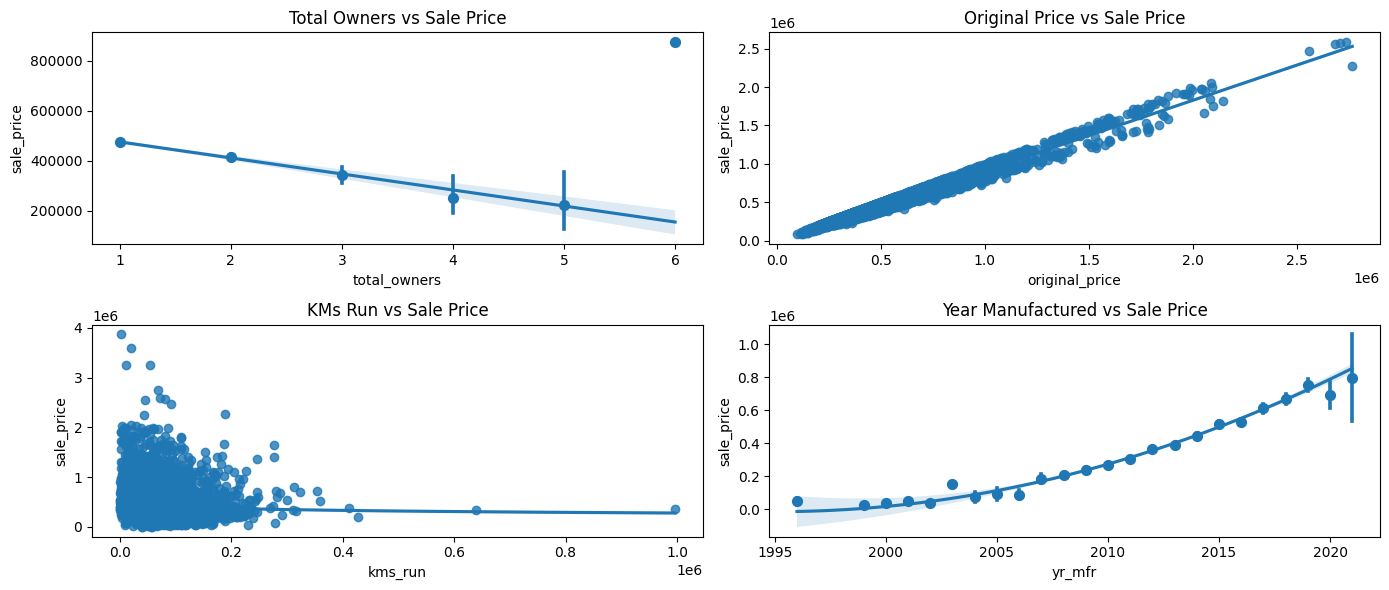

In [69]:
fig, axes = plt.subplots(2, 2, figsize=(14, 6))

sns.regplot(data=df, x="total_owners", y="sale_price", x_estimator=np.mean, ax=axes[0,0])
axes[0,0].set_title('Total Owners vs Sale Price')

sns.regplot(data=df, x="original_price", y="sale_price", ax=axes[0,1])
axes[0,1].set_title('Original Price vs Sale Price')

sns.regplot(data=df, x="kms_run", y="sale_price", ax=axes[1,0], logx=True)
axes[1,0].set_title('KMs Run vs Sale Price')

sns.regplot(data=df, x="yr_mfr", y="sale_price",  x_estimator=np.mean, ax=axes[1,1], order=2)
axes[1,1].set_title('Year Manufactured vs Sale Price') 

# Display the plots
plt.tight_layout()
plt.show()


# Categorical Data

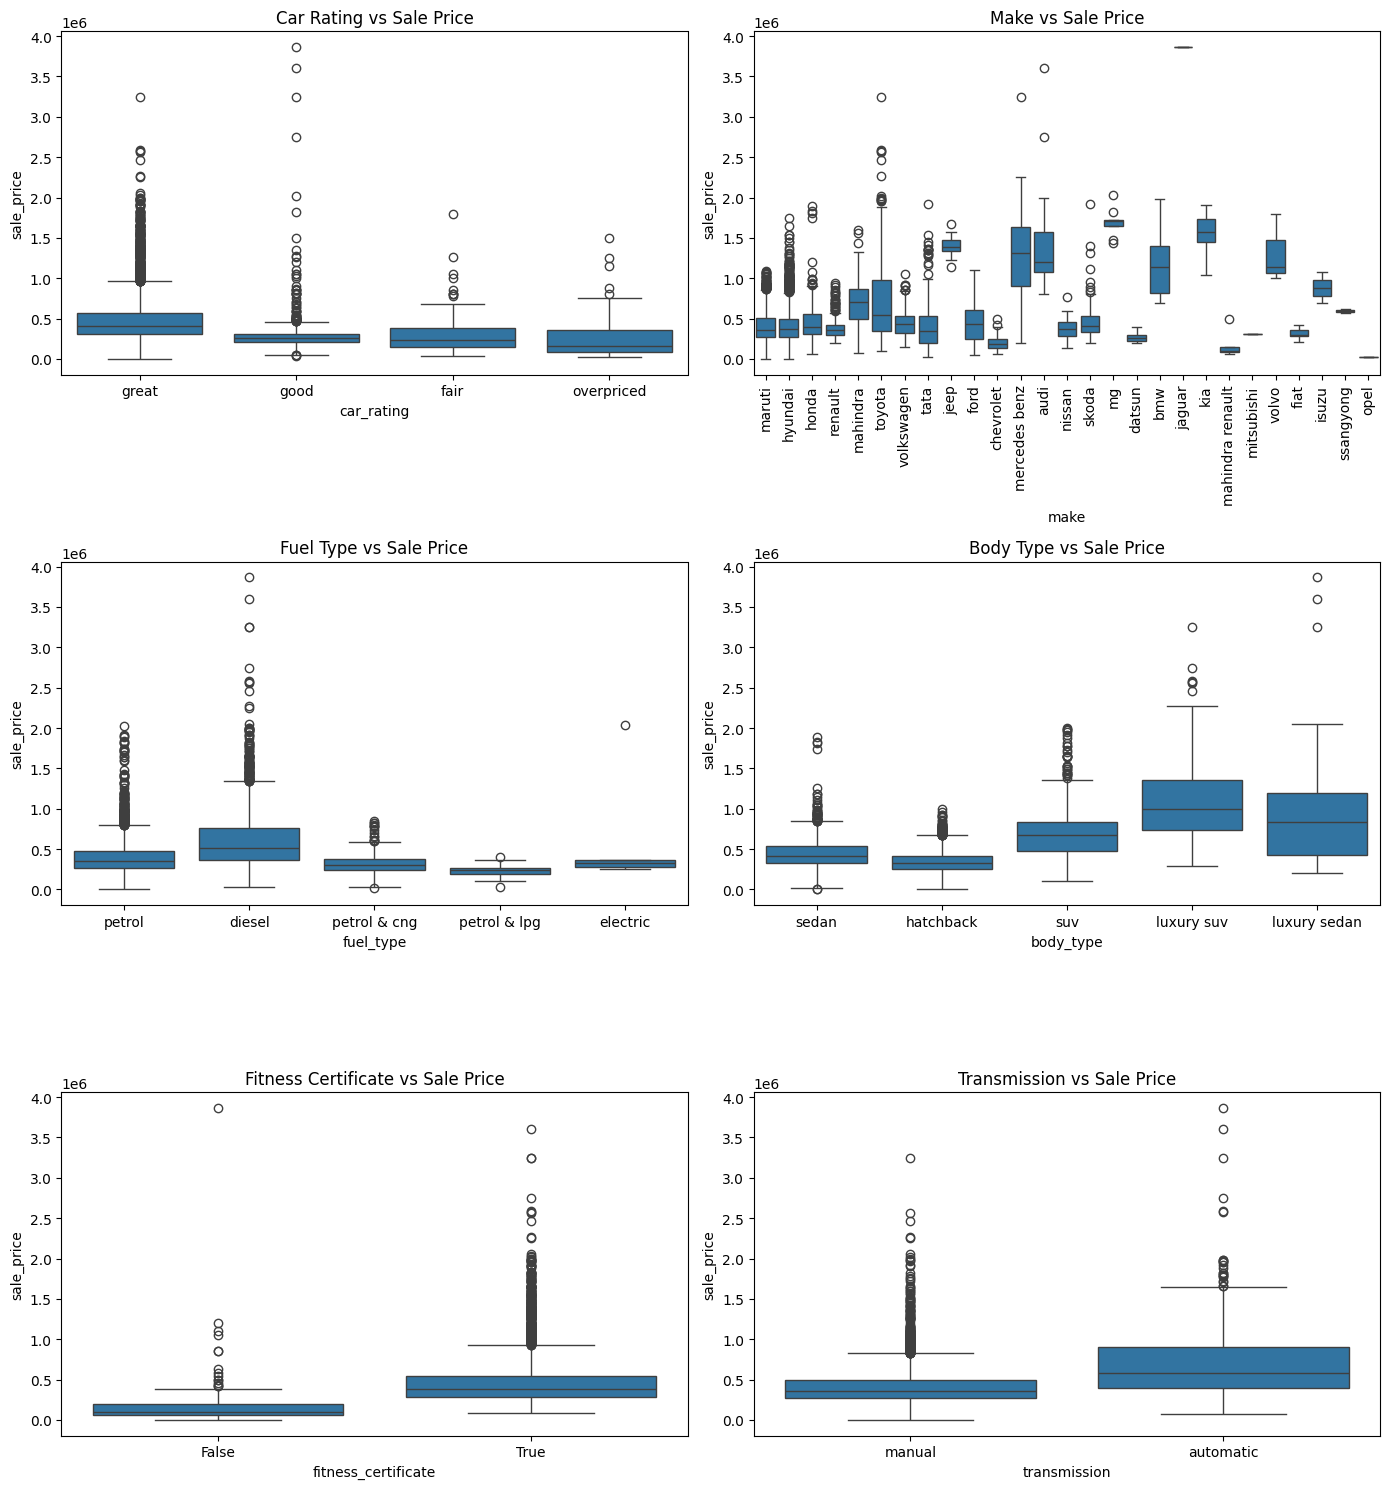

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(14, 15)) 

sns.boxplot(data=df, x="car_rating", y="sale_price", ax=axes[0, 0])
axes[0, 0].set_title('Car Rating vs Sale Price')

sns.boxplot(data=df, x="make", y="sale_price", ax=axes[0, 1])
axes[0, 1].set_title('Make vs Sale Price')
axes[0, 1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels in the second subplot

sns.boxplot(data=df, x="fuel_type", y="sale_price", ax=axes[1, 0]) 
axes[1, 0].set_title('Fuel Type vs Sale Price')

sns.boxplot(data=df, x="body_type", y="sale_price", ax=axes[1, 1])
axes[1, 1].set_title('Body Type vs Sale Price')

sns.boxplot(data=df, x="fitness_certificate", y="sale_price", ax=axes[2, 0])
axes[2, 0].set_title('Fitness Certificate vs Sale Price')

sns.boxplot(data=df, x="transmission", y="sale_price", ax=axes[2,1])  
axes[2, 1].set_title('Transmission vs Sale Price')


# Display the plots
plt.tight_layout()
plt.show()
